## Zomato Dataset Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df.shape

(9551, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## data analysis steps

1. Missing values 
2. Explore Numerical value
3. Explore Categorical values
4. Finding Relationship between features



In [12]:
df.isnull().sum() ## 9 missing values in cuisine


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

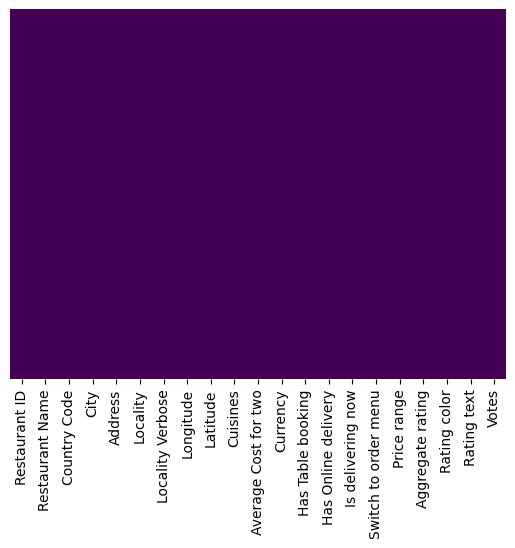

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [26]:
merge_df=pd.merge(df,df_country,on='Country Code',how='left')

In [27]:
merge_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [29]:
merge_df.dtypes ## to check dtype of columns


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [33]:
country_names =merge_df.Country.value_counts().index

In [34]:
country_values = merge_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x289a54268a0>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, '94.39%'),
  Text(0.5876081980578747, -0.12131201743923574, '4.73%'),
  Text(0.5997744672089791, -0.01644957398187513, '0.87%')])

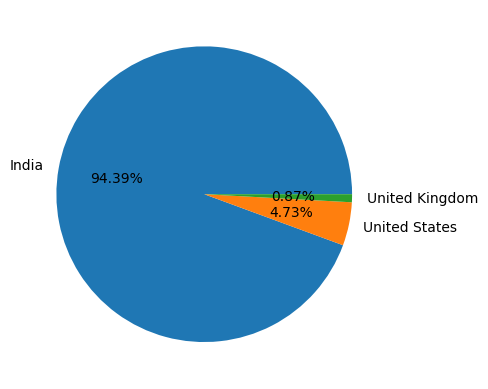

In [43]:
## pie chart of top 3 countries using zomato

plt.pie(country_values[:3],labels = country_names[:3],autopct='%1.2f%%')

## observation of above graph

- India dominates the dataset (8652 out of 9551 entries) and represents ~94.4% of the top-3 pie slice (8652 / 9166).
- United States (434, ~4.7%) and United Kingdom (80, ~0.9%) are very small in comparison.
- The pie chart highlights a strong skew toward India — the dataset is heavily India-centric.


In [44]:
merge_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [57]:
rating_count = merge_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [58]:
rating_count

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### Rating ranges
- 0.0 — Not rated (White)  
- 1.8–2.4 — Poor (Red)  
- 2.5–3.4 — Average (Orange)  
- 3.5–3.9 — Good (Yellow)  
- 4.0–4.4 — Very Good (Green)  
- 4.5–4.9 — Excellent (Dark Green)

### Observations
- 0.0 ("Not rated") is the largest single group (2148 entries) — a substantial portion of the dataset. 
- Maximum numbers of rating are between 2.5-3.4  
- Ratings concentrate around 3.0–3.4 (highest counts ~468–522), i.e., the "Average" range.  
- "Very Good" (4.0–4.4) has moderate representation; "Excellent" (4.5–4.9) and extreme low ratings are relatively rare.  
- Rating color labels consistently map to rating text (White → Not rated, Red → Poor, Orange → Average, Yellow → Good, Green/Dark Green → Very Good/Excellent).


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

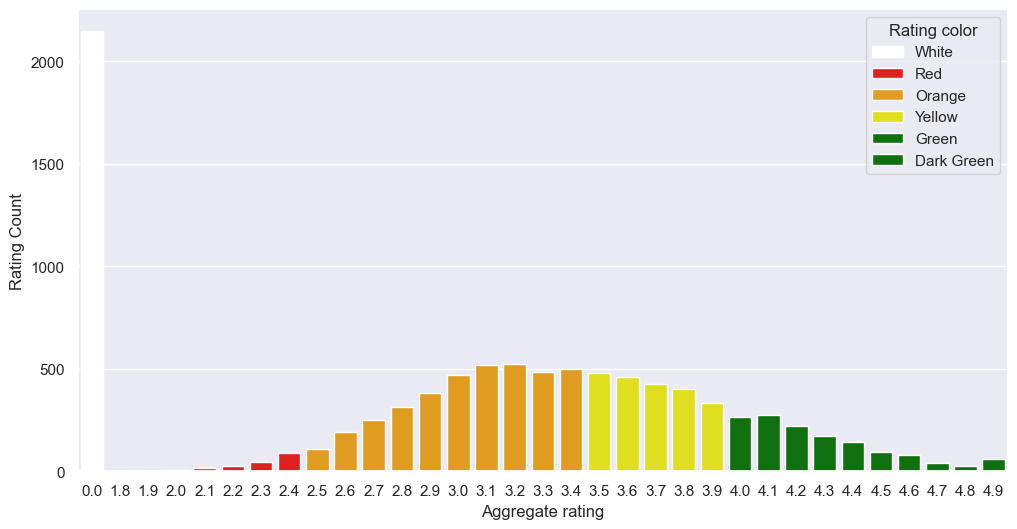

In [63]:
sns.set(rc={'figure.figsize':(12,6)})

sns.barplot(x='Aggregate rating',y='Rating Count',data=rating_count,hue='Rating color',palette=['white','red','orange','yellow','green','green'])

C:\Users\Ramwani\AppData\Local\Temp\ipykernel_16308\3040503373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Rating color',data=rating_count,palette=['white','red','orange','yellow','green','green'])


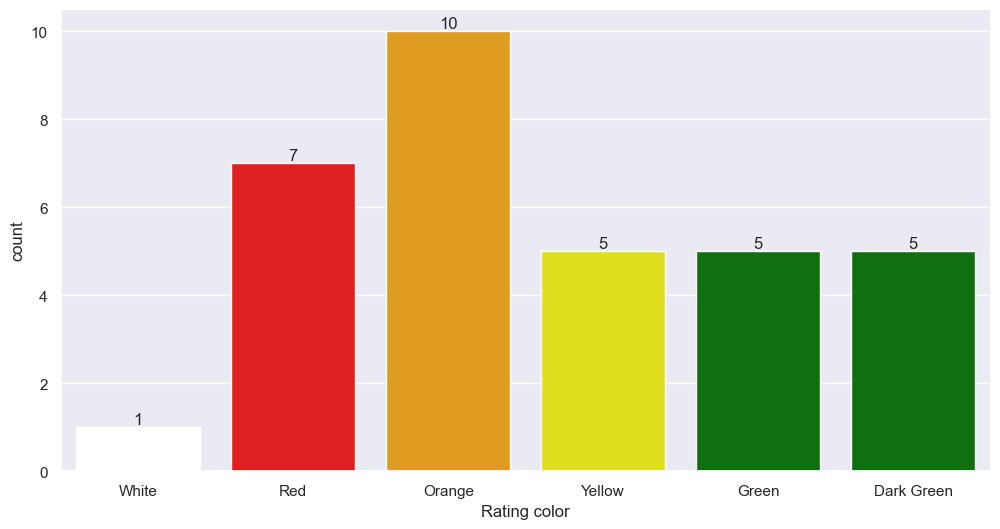

In [68]:
## Countplot


ax = sns.countplot(x='Rating color',data=rating_count,palette=['white','red','orange','yellow','green','green'])

for bar in ax.containers:
    ax.bar_label(bar)

In [82]:
## Find the countries name that has given 0 rating

country_with_zero_rating = merge_df[merge_df['Aggregate rating'] == 0].groupby('Country').size().reset_index()
country_with_zero_rating


,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## most of the zero ratings are from indian customer

In [90]:
## finding which currency is used by which country

country_with_currency = merge_df[['Country','Currency']].groupby('Country').first().reset_index()
country_with_currency

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


In [100]:
## findind which countries have online deliveries

country_with_online_delivery = merge_df[merge_df['Has Online delivery']=='Yes'].groupby('Country').size().reset_index()
country_with_online_delivery

,Country,0
0,India,2423
1,UAE,28


### Observations

- Dataset: 9,551 rows × 22 columns (9551 entries).  
- Geographic skew: India dominates the dataset (8652 / 9551 ≈ 90.6%); remaining data are small (United States 434, United Kingdom 80, others ≤ 60).  

- Zero/Not-rated distribution by country: India = 2,139, Brazil = 5, United States = 3, United Kingdom = 1 — most zero ratings come from India.  
- Online delivery: only India (2,423) and UAE (28) show "Has Online delivery = Yes" in the summary — online-delivery availability is concentrated in India.  
- Currency mapping: each country has an associated currency (e.g., India → Indian Rupees(Rs.), US/Canada/Australia/Singapore → Dollar($), Turkey → Turkish Lira(TL), etc.).  


([<matplotlib.patches.Wedge at 0x289a7e022a0>,
 [Text(-0.620750019801417, 0.9081131057949449, 'New Delhi'),
  Text(0.07888835908750508, -1.097167547278209, 'Gurgaon'),
  Text(0.8905339242558675, -0.6457161371295013, 'Noida'),
  Text(1.0945552359105255, -0.10931072930345874, 'Faridabad')],
 [Text(-0.33859091989168194, 0.4953344213426971, '69.1%'),
  Text(0.043030014047730034, -0.5984550257881139, '14.1%'),
  Text(0.4857457768668368, -0.352208802070637, '13.6%'),
  Text(0.5970301286784684, -0.059624034165522935, '3.2%')])

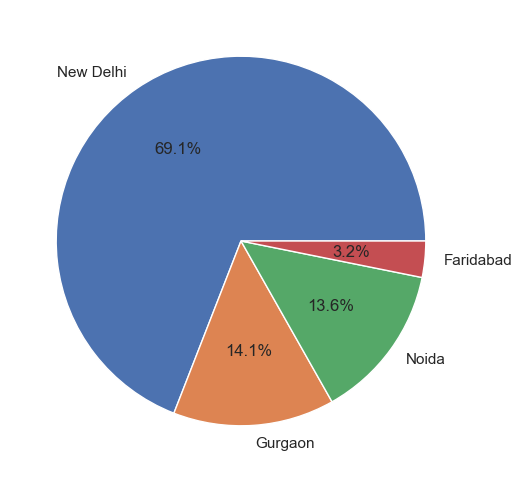

In [114]:
## create a pie chart for top 4 cities distribution

cities_top_4 = merge_df.City.value_counts().nlargest(4)

plt.pie(cities_top_4.values, labels=cities_top_4.index,autopct='%1.1f%%')


## observation of city graph

- New Delhi dominates the city distribution (5,473 entries ≈ 69.1% of top‑4; ≈ 57.3% of entire dataset).
- Gurgaon (1,118, ≈ 14.1%) and Noida (1,080, ≈ 13.6%) are notable but much smaller than New Delhi.
- Faridabad is minimal (251, ≈ 3.2%).
- Top‑4 cities together = 7,922 entries (≈ 82.9% of all 9,551 records)


([<matplotlib.patches.Wedge at 0x289a74078c0>,
 [Text(0.7383739591473525, 0.8153550738500767, 'North Indian'),
  Text(-0.5794679892179088, 0.9349956414185864, 'North Indian, Chinese'),
  Text(-1.0673095097169618, 0.2661774041269067, 'Chinese'),
  Text(-1.0185983597190356, -0.41527988342525135, 'Fast Food'),
  Text(-0.5935790624456829, -0.9261014505042654, 'North Indian, Mughlai'),
  Text(-0.0058866565538183155, -1.0999842486484148, 'Cafe'),
  Text(0.4842059922264186, -0.9876965916170967, 'Bakery'),
  Text(0.8087362934536483, -0.7456176014894329, 'North Indian, Mughlai, Chinese'),
  Text(1.0055375847517363, -0.445975521359239, 'Bakery, Desserts'),
  Text(1.0902990515030275, -0.14576686280358406, 'Street Food')],
 [Text(0.40274943226219223, 0.4447391311909509, '26.6%'),
  Text(-0.3160734486643138, 0.5099976225919561, '14.5%'),
  Text(-0.5821688234819792, 0.14518767497831275, '10.1%'),
  Text(-0.5555991053012921, -0.22651630005013706, '10.1%'),
  Text(-0.3237703976976452, -0.5051462457295

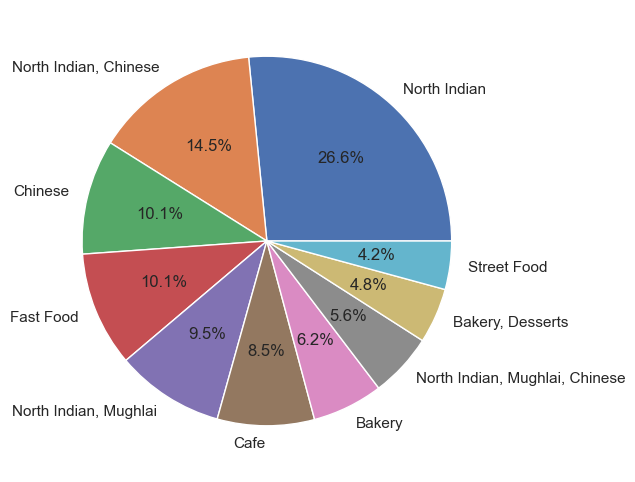

In [123]:
## finding the top 10 cuisine

top_10_cuisine = merge_df.Cuisines.value_counts().nlargest(10)
top_10_cuisine

# sizes (values) must be the first argument; labels are the second
plt.pie(top_10_cuisine.values, labels=top_10_cuisine.index, autopct='%1.1f%%')




### Analysis of the Top-10 Cuisines Pie Chart

- North Indian is the largest single cuisine: 936 entries (≈26.6% of the top‑10 slice; ≈9.8% of the full dataset).  
- Variants containing "North Indian" (North Indian, North Indian+Chinese, North Indian+Mughlai, North Indian+Mughlai+Chinese) together form the majority of the top‑10 (1,978 / 3,522 ≈ 56.1% of the top‑10; ≈20.7% overall) — strong dominance of North Indian styles.  
- Other notable categories in the top‑10: Chinese (354), Fast Food (354), Cafe (299), Bakery (218), Street Food (149).  


## Final conclusions

- Dataset summary
    - 9,551 restaurants, 22 columns. Cuisines missing for 9 rows.
    - Strong geographic skew: India = 8,652 / 9,551 (~90.6%) — dataset is India‑centric.

- Geography & cities
    - New Delhi dominates (5,473 records ≈ 57.3% of all rows). Top‑4 cities account for ~82.9% of data.
    - Analyses should treat country/city biases carefully (results may not generalize outside India).

- Ratings
    - Large "Not rated" group: Aggregate rating = 0.0 (2,148 entries, ~22.5%).
    - Ratings concentrate in the "Average" range (~2.5–3.4) with peaks around 3.0–3.4; fewer entries in the top ("Excellent") or bottom extremes.
    - Rating colors/text map consistently to rating ranges.

- Cuisine & offerings
    - North Indian and its hybrids dominate top cuisine counts (North Indian, North Indian+Chinese, etc.).
    - Top‑10 cuisines are skewed toward Indian and common urban categories (Fast Food, Cafe, Bakery, Street Food).

- Services & currency
    - "Has Online delivery = Yes" appears mainly for India (2,423) and a small presence in UAE (28).
    - Currency mapping by country is available and consistent.

- Actionable recommendations
    - Limit cross‑country comparisons or downsample India when making global claims.
    - Decide how to treat "Not rated" (exclude, impute, or analyze separately).
    - Normalize/split the Cuisines column (multi-label) for meaningful cuisine-level analysis.
    - Explore relationships: online delivery vs. ratings, price range/avg cost vs. ratings, votes vs. ratings.
    - If needed, stratify or reweight samples for balanced country/city analyses.

Overall: the dataset is rich for India‑focused insights (cities, cuisine patterns, delivery adoption), but any global conclusions require careful handling of the strong India bias and the large "Not rated" group.